<a href="https://colab.research.google.com/github/singhjyoti1997/Deep-Learning/blob/main/Querying_CSVs_and_Plot_Graphs_with_LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# Function to read and parse CSV files
def read_csv(file_path):
    return pd.read_csv("/content/data_by_artist.csv")

In [3]:

# Function to calculate basic statistics
def calculate_statistics(data):
    # Select only numeric columns for calculations
    numeric_data = data.select_dtypes(include=['number'])

    statistics = {
        'mean': numeric_data.mean(),
        'median': numeric_data.median(),
        'mode': numeric_data.mode().iloc[0],
        'std': numeric_data.std(),
        'correlation': numeric_data.corr()
    }
    return statistics

# Function to generate plots
def plot_data(data):
    # Histograms for numeric columns
    numeric_data = data.select_dtypes(include=['number'])
    numeric_data.hist(bins=15, figsize=(15, 10))
    plt.show()

    # Scatter Matrix for numeric columns
    pd.plotting.scatter_matrix(numeric_data, figsize=(15, 10))
    plt.show()

# Function to answer questions using LLM
def answer_question(prompt, model, tokenizer):
    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = model.generate(inputs["input_ids"], max_length=100)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

In [4]:
!pip install transformers
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch


Data Head:
   mode  count  acousticness  \
0     1      9      0.590111   
1     1     26      0.862538   
2     1      7      0.856571   
3     1     27      0.884926   
4     1      7      0.510714   

                                             artists  danceability  \
0                   "Cats" 1981 Original London Cast      0.467222   
1                          "Cats" 1983 Broadway Cast      0.441731   
2        "Fiddler On The Roof” Motion Picture Chorus      0.348286   
3     "Fiddler On The Roof” Motion Picture Orchestra      0.425074   
4  "Joseph And The Amazing Technicolor Dreamcoat"...      0.467143   

     duration_ms    energy  instrumentalness  liveness   loudness  \
0  250318.555556  0.394003          0.011400  0.290833 -14.448000   
1  287280.000000  0.406808          0.081158  0.315215 -10.690000   
2  328920.000000  0.286571          0.024593  0.325786 -15.230714   
3  262890.962963  0.245770          0.073587  0.275481 -15.639370   
4  270436.142857  0.488286    

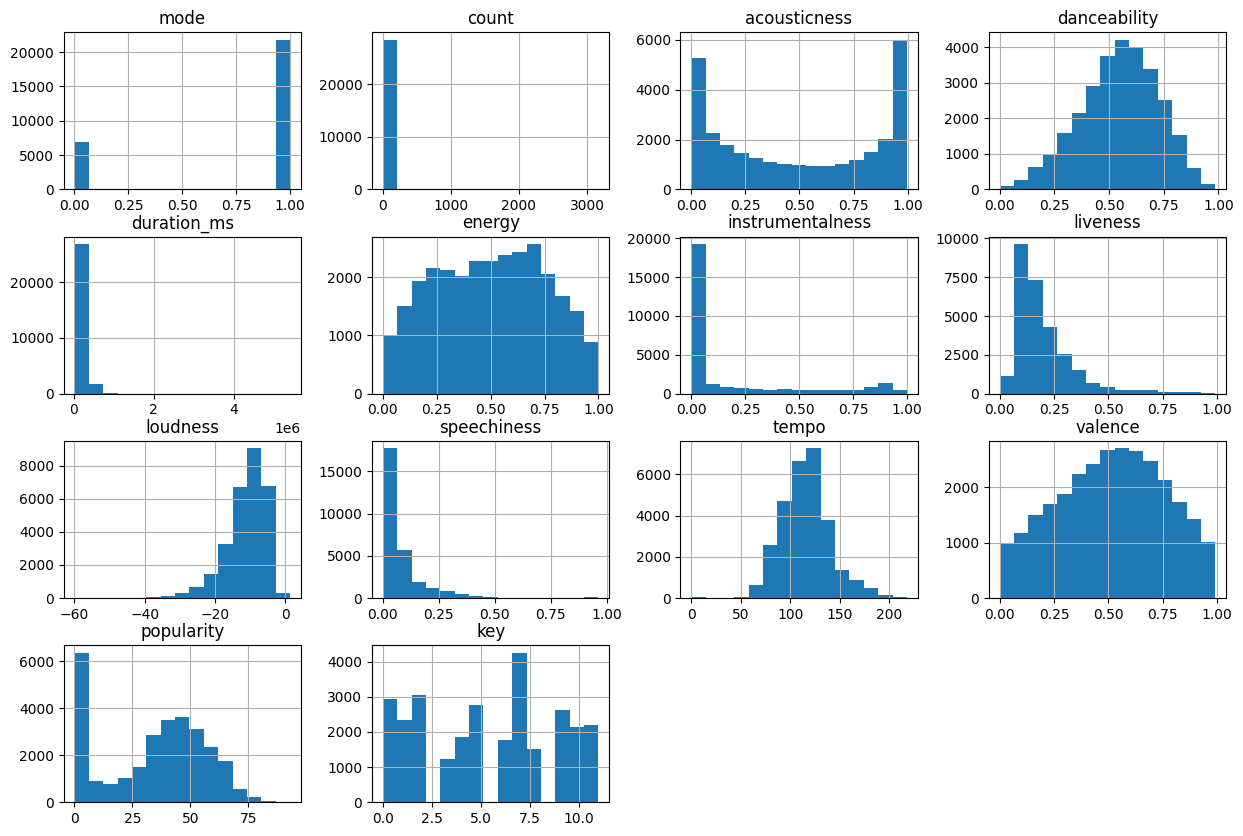

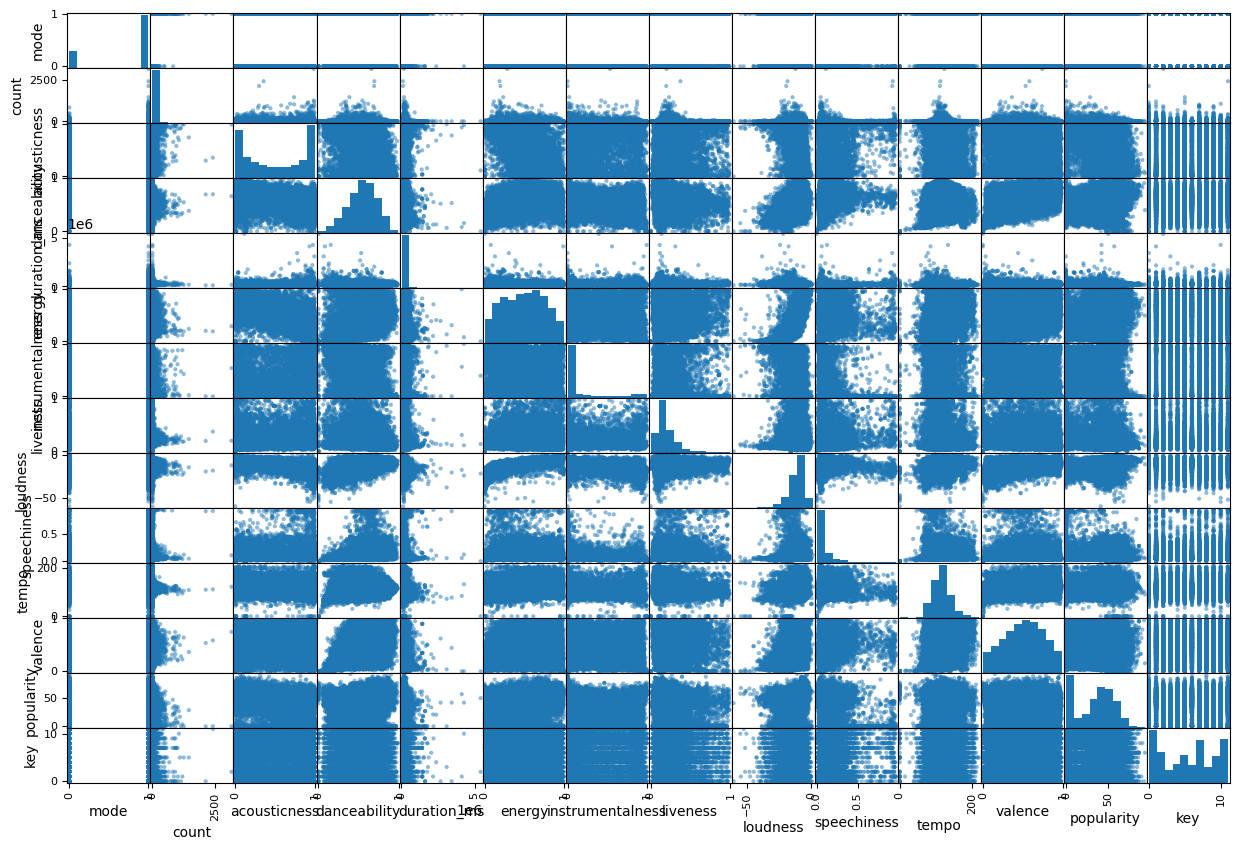

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Response from LLM:
59.0


In [5]:
# Main function
def main():
    file_path = '/content/data_by_artist.csv'
    data = read_csv(file_path)

    print("Data Head:")
    print(data.head())

    stats = calculate_statistics(data)
    print("Statistics:")
    print(stats)

    plot_data(data)

    model_name = "google/flan-t5-small"  # Replace with a available model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    # Use AutoModelForSeq2SeqLM for sequence-to-sequence models like T5
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

    question = "What is the median of the data?"
    response = answer_question(f"Question: {question}\nAnswer:", model, tokenizer)
    print("Response from LLM:")
    print(response)

if __name__ == "__main__":
    main()